In [195]:
why datediff -864 ,check it
replace zipcode xx with something
(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Company', 'State', 'ZIP code', 'Submitted via', 'Date sent to company',
       'Company response to consumer', 'Timely response?',
       'Consumer disputed?', 'Complaint ID', 'Days', 'Product---Sub-product',
       'En_Product---Sub-product','Days']

 'Tags', 'Consumer complaint narrative','Company public response','Consumer consent provided?'---removed


SyntaxError: invalid syntax (1450404443.py, line 1)

In [127]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import math
from sklearn.model_selection import train_test_split,KFold
import numpy as np
import seaborn as sns

In [135]:
CC_train=pd.read_csv("Consumer_Complaints_train.csv")
CC_test=pd.read_csv("Consumer_Complaints_test_share.csv")

In [111]:
import pandas as pd

CC_train['data']='train'
CC_test['data']='test'

extra_in_train = set(CC_train.columns) - set(CC_test.columns)
extra_in_test = set(CC_test.columns) - set(CC_train.columns)

print("Extra columns in train_dataset:", extra_in_train)
print("Extra columns in testing_dataset:", extra_in_test)

all_data=pd.concat([CC_train,CC_test],0,sort=False)

print("\nConcatenated DataFrame:")
print(all_data)

Extra columns in train_dataset: {'Consumer disputed?'}
Extra columns in testing_dataset: set()


TypeError: concat() takes 1 positional argument but 2 positional arguments (and 1 keyword-only argument) were given

In [113]:
    CC_train.drop(columns=['data'], inplace=True)
    CC_test.drop(columns=['data'], inplace=True) 

In [7]:
import pandas as pd


null_counts = CC_train.isnull().sum()
null_counts_percentage = (CC_train.isnull().sum() / len(CC_train)) * 100
data_types = CC_train.dtypes

combined_info = pd.DataFrame({
    'Null Count': null_counts,
    'Null counts%': null_counts_percentage,
    'Data Type': data_types
})

combined_info = combined_info.sort_values(by='Null counts%', ascending=False)

print(combined_info)

                              Null Count  Null counts% Data Type
Tags                              411215     85.952540    object
Consumer complaint narrative      403327     84.303783    object
Company public response           388029     81.106181    object
Consumer consent provided?        342934     71.680382    object
Sub-issue                         292625     61.164748    object
Sub-product                       138473     28.943755    object
ZIP code                            3848      0.804313    object
State                               3839      0.802431    object
Date sent to company                   0      0.000000    object
Consumer disputed?                     0      0.000000    object
Timely response?                       0      0.000000    object
Company response to consumer           0      0.000000    object
Date received                          0      0.000000    object
Submitted via                          0      0.000000    object
Product                  

In [117]:
Creditcard_duplicated=CC_train.duplicated().value_counts()
Creditcard_duplicated.head()

False    478421
Name: count, dtype: int64

In [133]:
CC_train['Days'].value_counts()

Days
0      199266
1       56248
2       35686
3       28772
4       26731
        ...  
382         1
328         1
270         1
398         1
626         1
Name: count, Length: 394, dtype: int64

In [137]:
CC_train = CC_train.drop(columns=['Tags', 'Consumer complaint narrative','Company public response','Consumer consent provided?'])

In [11]:
import pandas as pd

# Assuming CC_train is already defined and loaded
columns_to_check = ['Sub-issue', 'Sub-product', 'ZIP code', 'State']
categorical1 = CC_train[columns_to_check]

# Create a dictionary to store results for each column
top_values_data = {}

# Loop through each categorical column
for col in categorical1.columns:
    # Get the top 5 most frequent values and their counts
    top_values = categorical1[col].value_counts().nlargest(5)
    
    # Calculate the percentage of these values
    top_percentages = (top_values / len(categorical1[col])) * 100
    
    # Store in a DataFrame for easy understanding
    top_values_data[col] = pd.DataFrame({
        'Top Values': top_values.index,
        'Count': top_values.values,
        'Percentage (%)': top_percentages.values
    })

    print(f'Top 5 values for column: {col}')
    print(top_values_data[col])
    print('==============================================')

# Optional: Access each column's top 5 values DataFrame using top_values_data dictionary
# Example: top_values_data['Sub-issue']


Top 5 values for column: Sub-issue
                             Top Values  Count  Percentage (%)
0                        Account status  22891        4.784698
1                      Debt is not mine  22333        4.668064
2               Information is not mine  17625        3.683994
3  Not given enough info to verify debt  11124        2.325149
4                         Debt was paid   9885        2.066172
Top 5 values for column: Sub-product
                              Top Values  Count  Percentage (%)
0                         Other mortgage  61522       12.859385
1            Conventional fixed mortgage  48028       10.038857
2                       Checking account  38310        8.007592
3  Other (i.e. phone, health club, etc.)  25691        5.369957
4                          I do not know  18169        3.797701
Top 5 values for column: ZIP code
  Top Values  Count  Percentage (%)
0      300XX   1229        0.256887
1      750XX    967        0.202123
2      770XX    901     

In [139]:
# Replace null/NAN values with the mode for each column
for col in columns_to_check:
    CC_train[col].fillna(CC_train[col].mode()[0], inplace=True)

# Check if NAN values are replaced
print(CC_train[columns_to_check].isnull().sum())  # Should return 0 for each column


Sub-issue      0
Sub-product    0
ZIP code       0
State          0
dtype: int64


In [33]:
CC_train.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Company', 'State', 'ZIP code', 'Submitted via', 'Date sent to company',
       'Company response to consumer', 'Timely response?',
       'Consumer disputed?', 'Complaint ID', 'Days'],
      dtype='object')

In [141]:
import pandas as pd

# Assuming CC_train is already loaded

# Convert 'Date received' and 'Date sent to company' to datetime datatype
CC_train['Date received'] = pd.to_datetime(CC_train['Date received'], errors='coerce')
CC_train['Date sent to company'] = pd.to_datetime(CC_train['Date sent to company'], errors='coerce')

# Calculate the difference in days
CC_train['Days'] = ( CC_train['Date sent to company']- CC_train['Date received'] ).dt.days

# Ensure 'Days' column is of numeric datatype
CC_train['Days'] = pd.to_numeric(CC_train['Days'], errors='coerce')

# Display the updated DataFrame
#print(CC_train1[['Date received', 'Date sent to company', 'Days']].head())
#CC_train1.to_excel(r'F:\jupyter\Date.xlsx', index=False)

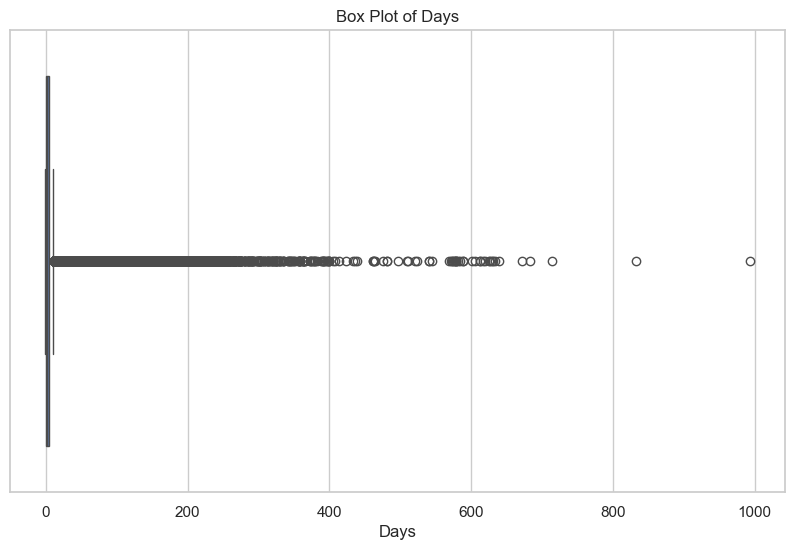

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Create a box plot for the 'Days' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=CC_train['Days'])
plt.title('Box Plot of Days')
plt.xlabel('Days')
plt.show()


In [117]:
for col in CC_train.columns:
    print(col,':',CC_train[col].nunique())

Date received : 1759
Product : 12
Sub-product : 47
Issue : 95
Sub-issue : 68
Company : 3276
State : 62
ZIP code : 25962
Submitted via : 6
Date sent to company : 1706
Company response to consumer : 7
Timely response? : 2
Consumer disputed? : 2
Days : 398
Product---Sub-product : 53
En_Product---Sub-product : 52
En_Submitted via : 6
En_State : 62
En_Sub-issue : 68
En_Company response to consumer : 7
En_Company : 5200
En_ZIP code : 40639


In [143]:
CC_train['Consumer disputed?']=np.where(CC_train['Consumer disputed?']=="Yes",1,0)
CC_train['Timely response?']=np.where(CC_train['Timely response?']=="Yes",1,0)

In [145]:
CC_train['Product---Sub-product'] = CC_train['Product'] + '---' + CC_train['Sub-product']

In [147]:
import pandas as pd

# Calculate the count of 'Consumer disputed?' for each 'Product---Sub-product'
encoded_count = CC_train.groupby('Product---Sub-product')['Consumer disputed?'].count()

# Sort based on the count in descending order
sorted_encoded_count = encoded_count.sort_values(ascending=False)

# Assign ranks to the sorted counts, and convert the rank to integers
ranked_encoded_count = sorted_encoded_count.rank(ascending=False, method='dense').astype(int)

# Combine the sorted counts with their ranks into a DataFrame
ranked_df = pd.DataFrame({
    'Count': sorted_encoded_count,
    'Rank': ranked_encoded_count
})

# Map the ranks back to the original CC_train DataFrame
CC_train['En_Product---Sub-product'] = CC_train['Product---Sub-product'].map(ranked_encoded_count)


In [149]:
 CC_train.drop(columns=['Complaint ID'], inplace=True)

In [151]:
import pandas as pd

# Define a function to apply ranking based on counts for a given column
def encode_and_rank(df, column, target):
    # Calculate the count of the target column for each unique value in the specified column
    encoded_count = df.groupby(column)[target].count()
    
    # Sort based on the count in descending order
    sorted_encoded_count = encoded_count.sort_values(ascending=False)
    
    # Assign ranks to the sorted counts, and convert the rank to integers
    ranked_encoded_count = sorted_encoded_count.rank(ascending=False, method='dense').astype(int)
    
    # Map the ranks back to the original DataFrame and create a new column with 'En_' prefix
    df[f'En_{column}'] = df[column].map(ranked_encoded_count)

# List of columns to apply the encoding
columns_to_encode = ['Product---Sub-product', 'Submitted via', 'State', 'Sub-issue', 'Company response to consumer']

# Target column for encoding
target_column = 'Consumer disputed?'

# Apply the function to each column in the list
for col in columns_to_encode:
    encode_and_rank(CC_train, col, target_column)

# Now CC_train will have new encoded columns like 'En_Product---Sub-product', 'En_Submitted via', etc.


In [153]:
import pandas as pd
import hashlib

# Function to perform hash encoding
def hash_encode(df, column, target):
    # Create a new column for hashed values
    df[f'En_{column}'] = df[column].astype(str) + df[target].astype(str)
    df[f'En_{column}'] = df[f'En_{column}'].apply(lambda x: int(hashlib.md5(x.encode()).hexdigest(), 16) % 2**32)

# Apply hash encoding on 'Company'
hash_encode(CC_train, 'Company', 'Consumer disputed?')

# Apply hash encoding on 'ZIP code'
hash_encode(CC_train, 'ZIP code', 'Consumer disputed?')

# Now CC_train will have new hashed columns 'En_Company' and 'En_ZIP code'


In [105]:
CC_train.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Company', 'State', 'ZIP code', 'Submitted via', 'Date sent to company',
       'Company response to consumer', 'Timely response?',
       'Consumer disputed?', 'Days', 'Product---Sub-product',
       'En_Product---Sub-product', 'En_Submitted via', 'En_State',
       'En_Sub-issue', 'En_Company response to consumer', 'En_Company',
       'En_ZIP code'],
      dtype='object')

In [107]:
import pandas as pd

def whisker(CC_train, col):
    q1 = CC_train[col].quantile(0.25)
    q3 = CC_train[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    
    between_q1_q3 = CC_train[(CC_train[col] >= q1) & (CC_train[col] <= q3)]
    below_q1 = CC_train[CC_train[col] < q1]
    above_q3 = CC_train[CC_train[col] > q3]
    
    between_q1_q3_range = (between_q1_q3[col].min(), between_q1_q3[col].max())
    below_q1_range = (below_q1[col].min(), below_q1[col].max()) if not below_q1.empty else (None, None)
    above_q3_range = (above_q3[col].min(), above_q3[col].max()) if not above_q3.empty else (None, None)
    
    return {
        "Column": col,
        "Lower Bound": lower,
        "Upper Bound": upper,
        "Between Q1-Q3 (Min, Max)": between_q1_q3_range,
        "Below Q1 (Min, Max)": below_q1_range,
        "Above Q3 (Min, Max)": above_q3_range
    }

# Example usage
numeric_columns = CC_train.select_dtypes(include=['int32', 'int64', 'float64']).columns
results = []

for col in numeric_columns:
    result = whisker(CC_train, col)
    results.append(result)

# Convert results to DataFrame
result_df = pd.DataFrame(results)

# Display the table in a properly formatted way
pd.set_option('display.max_columns', None)  # Ensure all columns are shown
pd.set_option('display.width', None)        # Disable wrapping for wide tables
pd.set_option('display.colheader_justify', 'center')  # Center headers

# Print the DataFrame
print(result_df.to_string(index=False))


             Column               Lower Bound  Upper Bound Between Q1-Q3 (Min, Max)  Below Q1 (Min, Max)    Above Q3 (Min, Max)   
               Timely response?  1.000000e+00          1.0                   (1, 1)                (0, 0)             (None, None)
             Consumer disputed?  0.000000e+00          0.0                   (0, 0)          (None, None)                   (1, 1)
                           Days -6.000000e+00         10.0                   (0, 4)              (-1, -1)                 (5, 993)
       En_Product---Sub-product -8.500000e+00         19.5                   (2, 9)                (1, 1)                 (10, 52)
               En_Submitted via -5.000000e-01          3.5                   (1, 2)          (None, None)                   (3, 6)
                       En_State -1.900000e+01         37.0                  (2, 16)                (1, 1)                 (17, 62)
                   En_Sub-issue -3.500000e+00          8.5                   (1, 4)

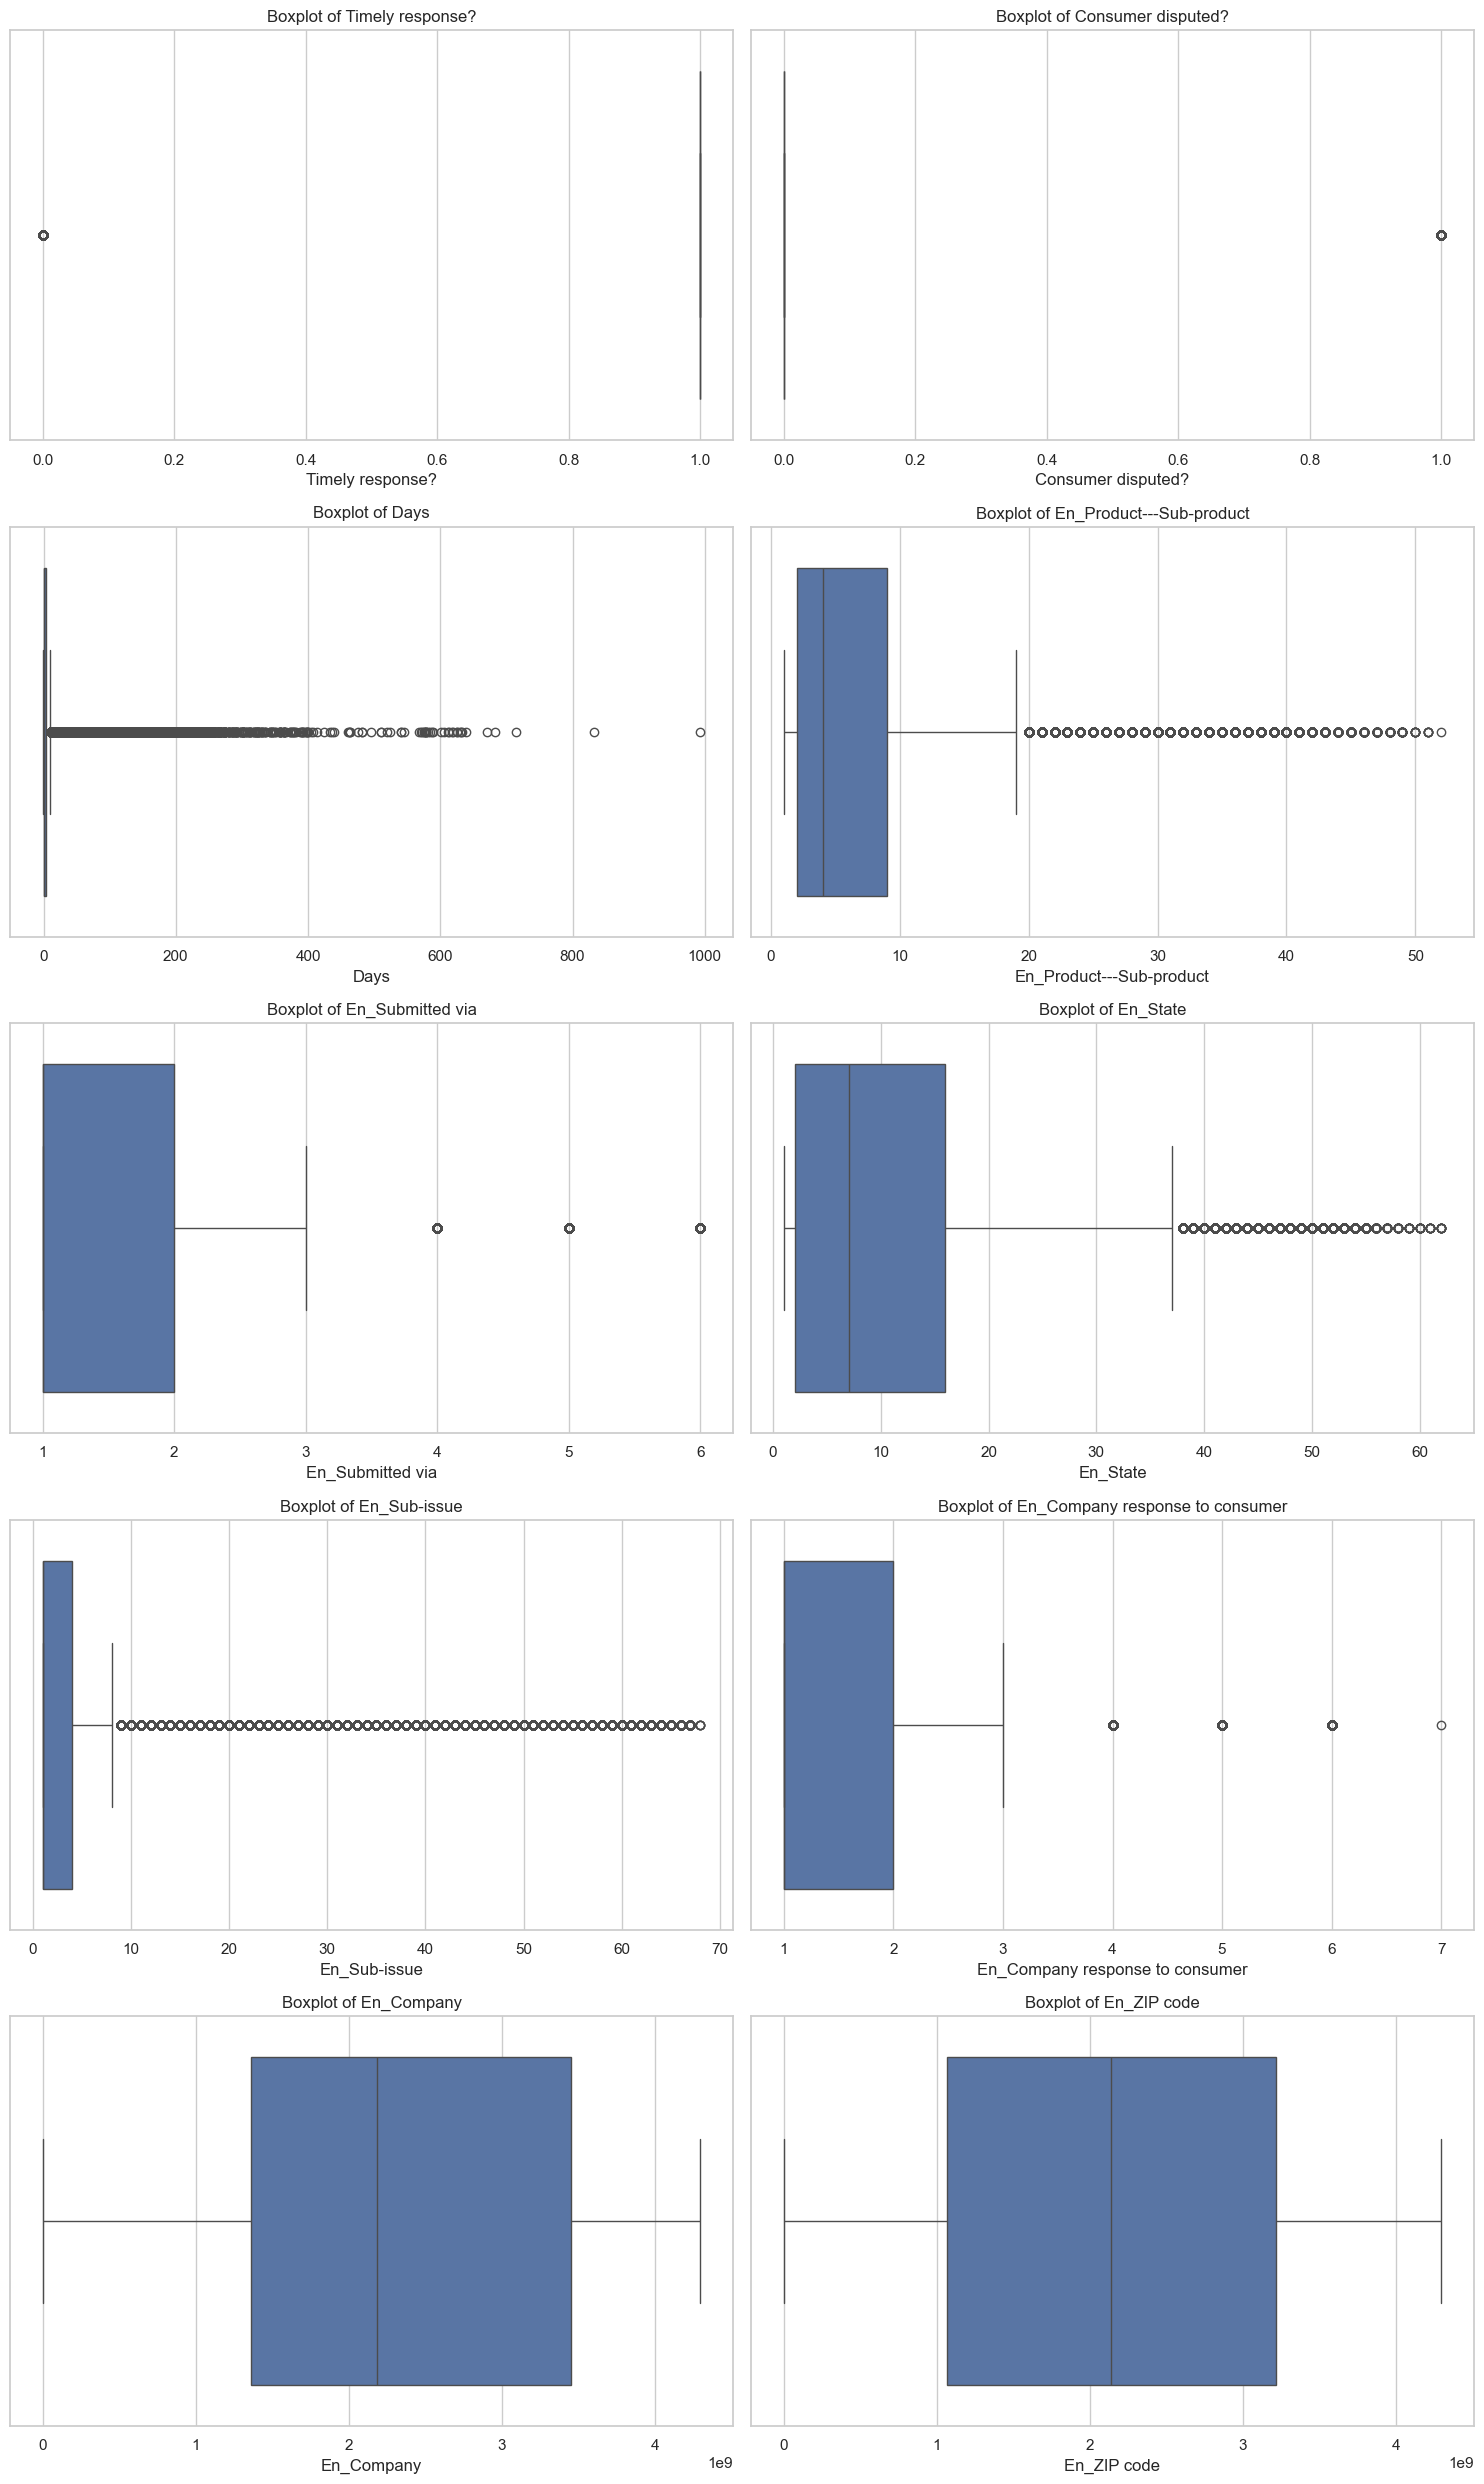

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Get all numeric columns (both int and float) from the Property DataFrame
numeric_columns = CC_train.select_dtypes(include=['int32', 'int64', 'float64']).columns

# Determine the number of rows and columns needed for the subplots
num_plots = len(numeric_columns)
num_cols = 2  # Number of columns for subplots
num_rows = math.ceil(num_plots / num_cols)  # Calculate the required number of rows

# Set the figure size dynamically based on the number of rows
plt.figure(figsize=(15, 5 * num_rows))

# Loop through each numeric column and create a boxplot
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)  # Create subplots dynamically
    sns.boxplot(x=CC_train[col])  # Boxplot for each numeric column
    plt.title(f'Boxplot of {col}')  # Set the title to show the column name

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [157]:
CC_train.to_excel(r'F:\jupyter\Card21.xlsx', index=False)

In [ ]:
logarithmic starts  please dont touch

In [57]:
import numpy as np
import pandas as pd

# List of columns to apply logarithmic transformation
columns_to_transform = ['En_Product---Sub-product', 'Days', 'En_Submitted via', 'En_State', 'En_Sub-issue', 'En_Company response to consumer']

# Create new columns with logarithmic transformation
for col in columns_to_transform:
    # Check if the column exists in CC_train and avoid negative or zero values
    if col in CC_train.columns:
        # Apply logarithmic transformation
        CC_train[f'log_{col}'] = np.log(CC_train[col].replace(0, np.nan))  # Replace 0s with NaN to avoid log(0)

# Display the first few rows of the modified DataFrame to verify the new columns


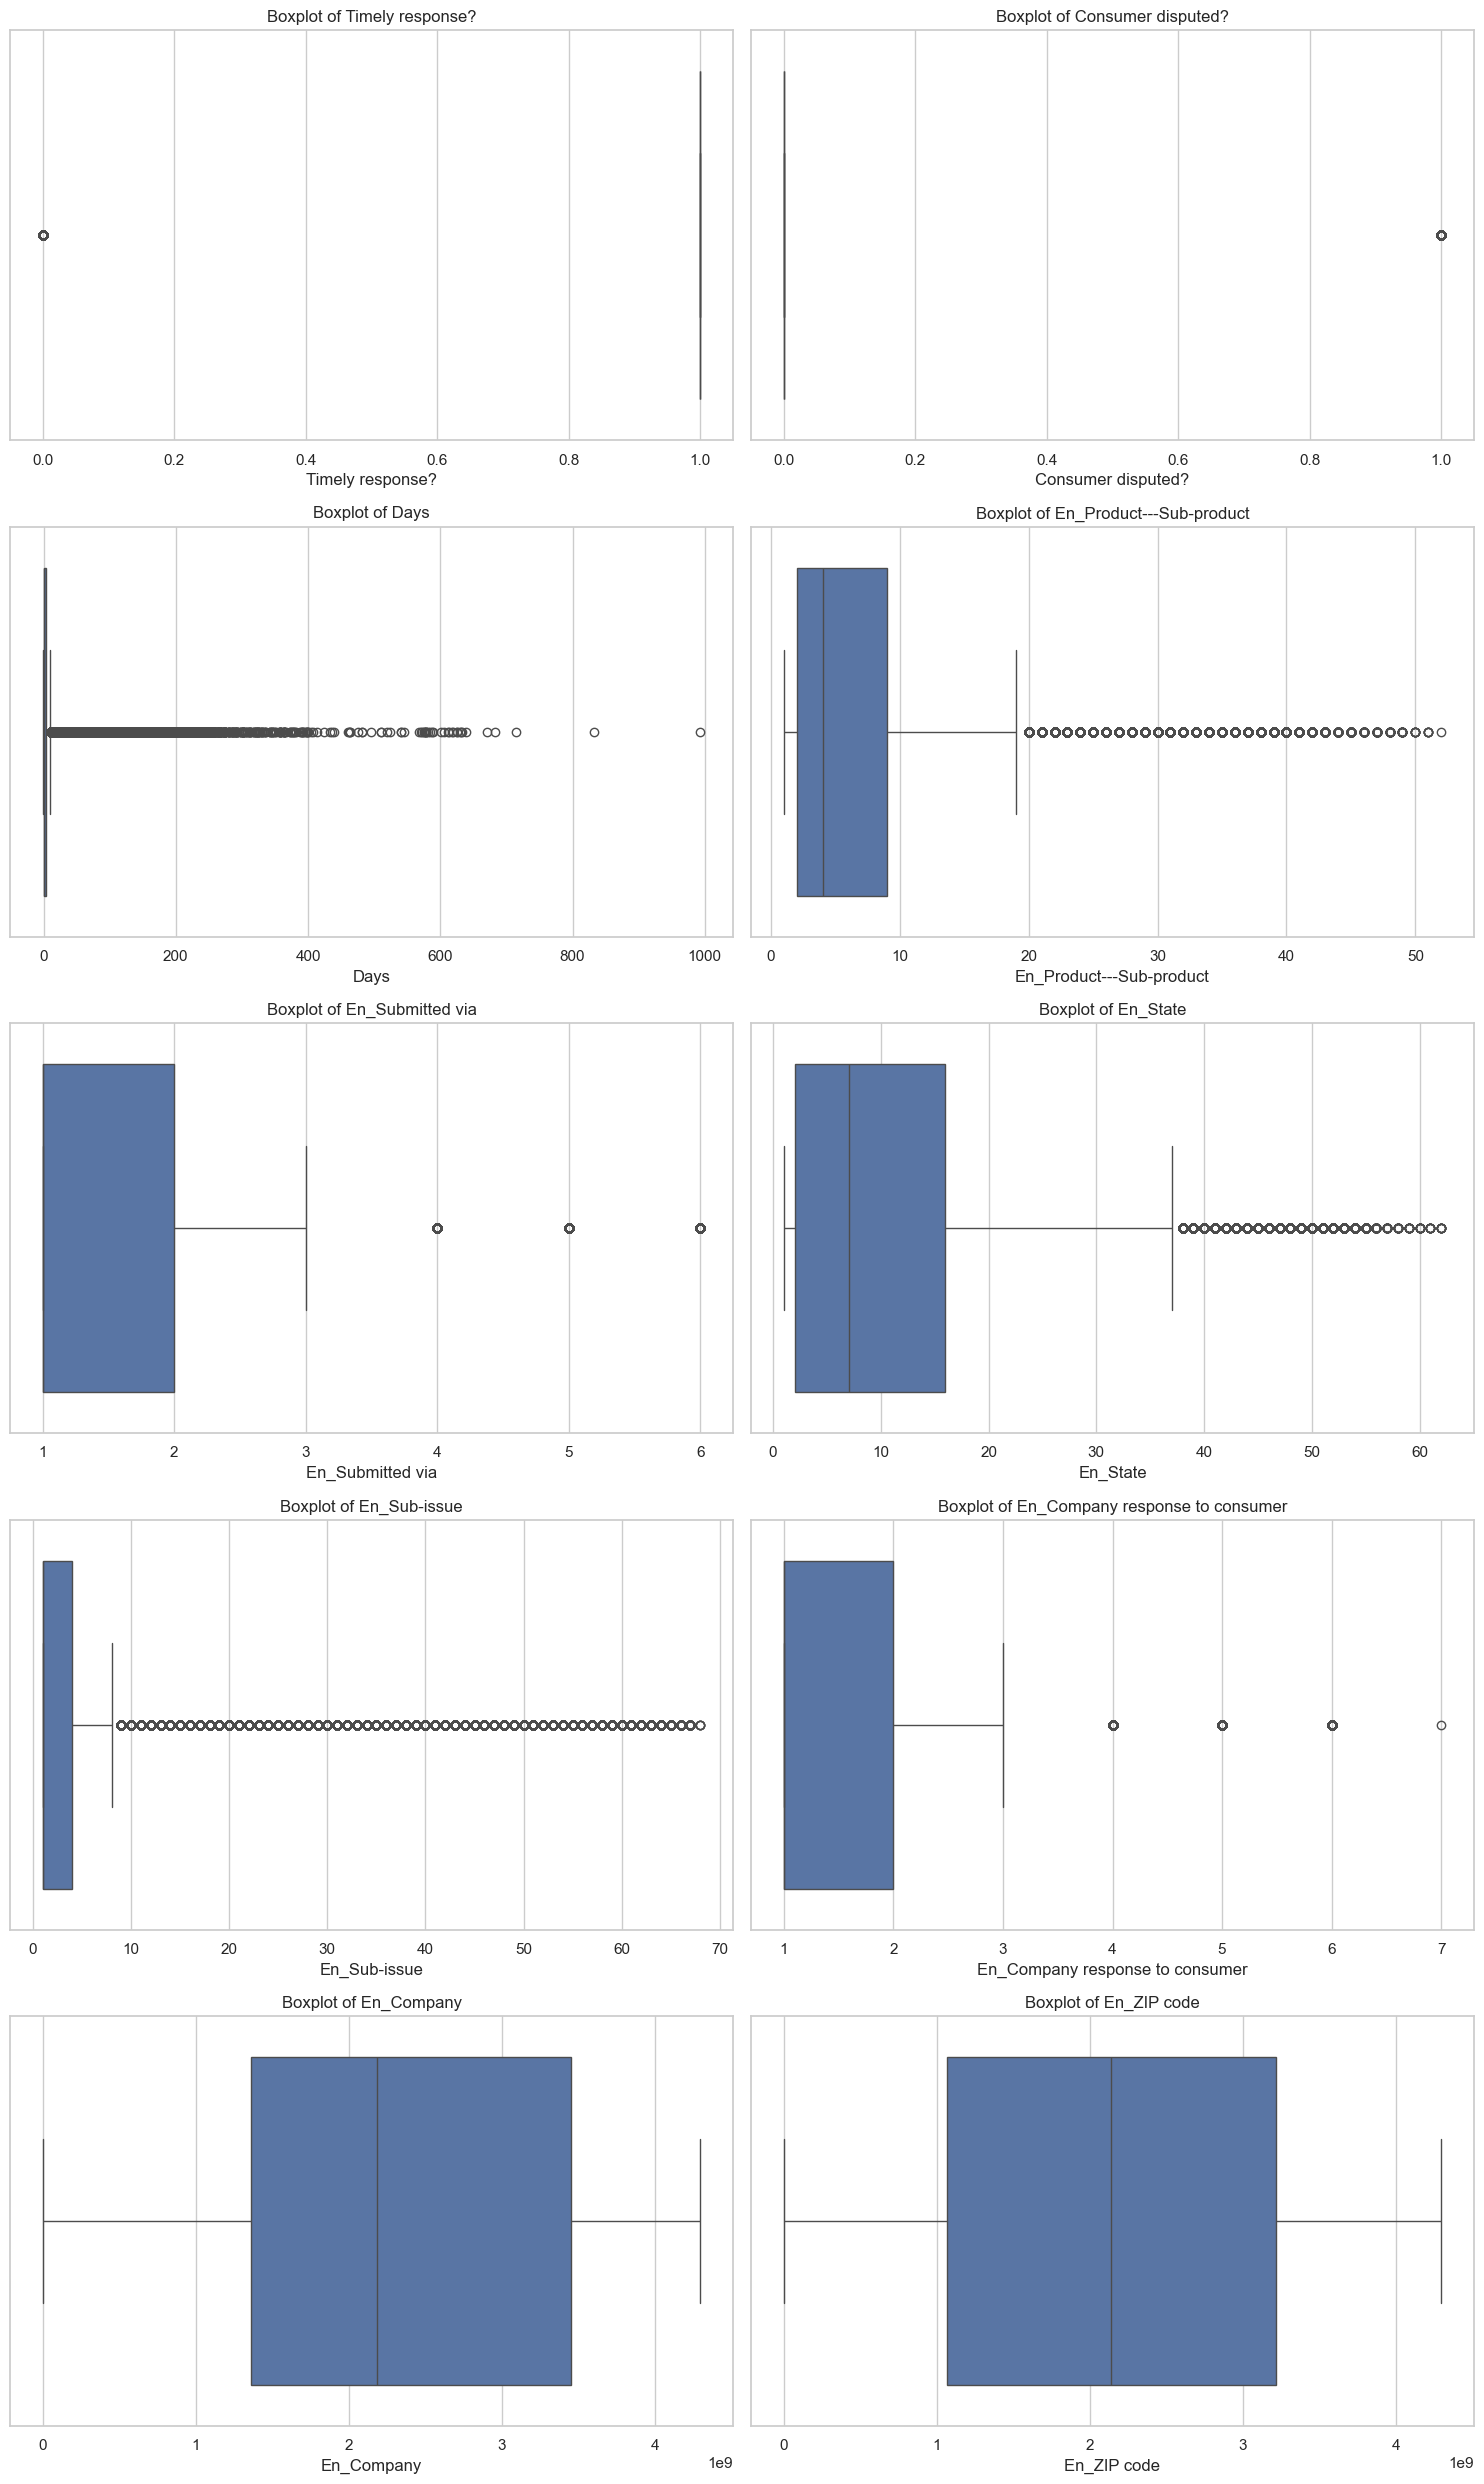

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Get all numeric columns (both int and float) from the Property DataFrame
numeric_columns = CC_train.select_dtypes(include="number").columns

# Determine the number of rows and columns needed for the subplots
num_plots = len(numeric_columns)
num_cols = 2  # Number of columns for subplots
num_rows = math.ceil(num_plots / num_cols)  # Calculate the required number of rows

# Set the figure size dynamically based on the number of rows
plt.figure(figsize=(15, 5 * num_rows))

# Loop through each numeric column and create a boxplot
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)  # Create subplots dynamically
    sns.boxplot(x=CC_train[col])  # Boxplot for each numeric column
    plt.title(f'Boxplot of {col}')  # Set the title to show the column name

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [113]:
import pandas as pd

# Get all columns from CC_train that are of numeric datatype
numeric_columns = CC_train.select_dtypes(include=['int32', 'int64', 'float64']).columns

# Display the list of numeric columns
print("Columns in CC_train that contain numeric datatypes:")
print(numeric_columns)


Columns in CC_train that contain numeric datatypes:
Index(['Timely response?', 'Consumer disputed?', 'Days',
       'En_Product---Sub-product', 'En_Submitted via', 'En_State',
       'En_Sub-issue', 'En_Company response to consumer', 'En_Company',
       'En_ZIP code'],
      dtype='object')


In [115]:
import pandas as pd


null_counts = CC_train.isnull().sum()
null_counts_percentage = (CC_train.isnull().sum() / len(CC_train)) * 100
data_types = CC_train.dtypes

combined_info = pd.DataFrame({
    'Null Count': null_counts,
    'Null counts%': null_counts_percentage,
    'Data Type': data_types
})

combined_info = combined_info.sort_values(by='Null counts%', ascending=False)

print(combined_info)

                                 Null Count  Null counts%    Data Type   
Date received                         0           0.0      datetime64[ns]
Product                               0           0.0              object
En_Company                            0           0.0               int64
En_Company response to consumer       0           0.0               int32
En_Sub-issue                          0           0.0               int32
En_State                              0           0.0               int32
En_Submitted via                      0           0.0               int32
En_Product---Sub-product              0           0.0               int32
Product---Sub-product                 0           0.0              object
Days                                  0           0.0               int64
Consumer disputed?                    0           0.0               int32
Timely response?                      0           0.0               int32
Company response to consumer          

In [119]:
# Define the function to remove outliers using IQR
def remove_outliers(CC_train, col):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    q1 = CC_train[col].quantile(0.25)
    q3 = CC_train[col].quantile(0.75)
    iqr = q3 - q1  # Interquartile Range (IQR)

    # Define lower and upper bounds for outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    # Filter out the outliers by keeping only the data within the bounds
    filtered_data = CC_train[(CC_train[col] >= lower_bound) & (CC_train[col] <= upper_bound)]
    
    return filtered_data

# List of specific columns to apply the outlier removal
specific_columns = ['log_Days','En_Product---Sub-product',
       'En_Company',
       'En_ZIP code', 'log_En_Product---Sub-product', 'log_Days',
       'log_En_Submitted via', 'log_En_State', 'log_En_Sub-issue',
       'log_En_Company response to consumer']

# Remove outliers for each specific column
for col in specific_columns:
    if col in CC_train.columns:  # Check if the column exists in the DataFrame
        CC_train = remove_outliers(CC_train, col)



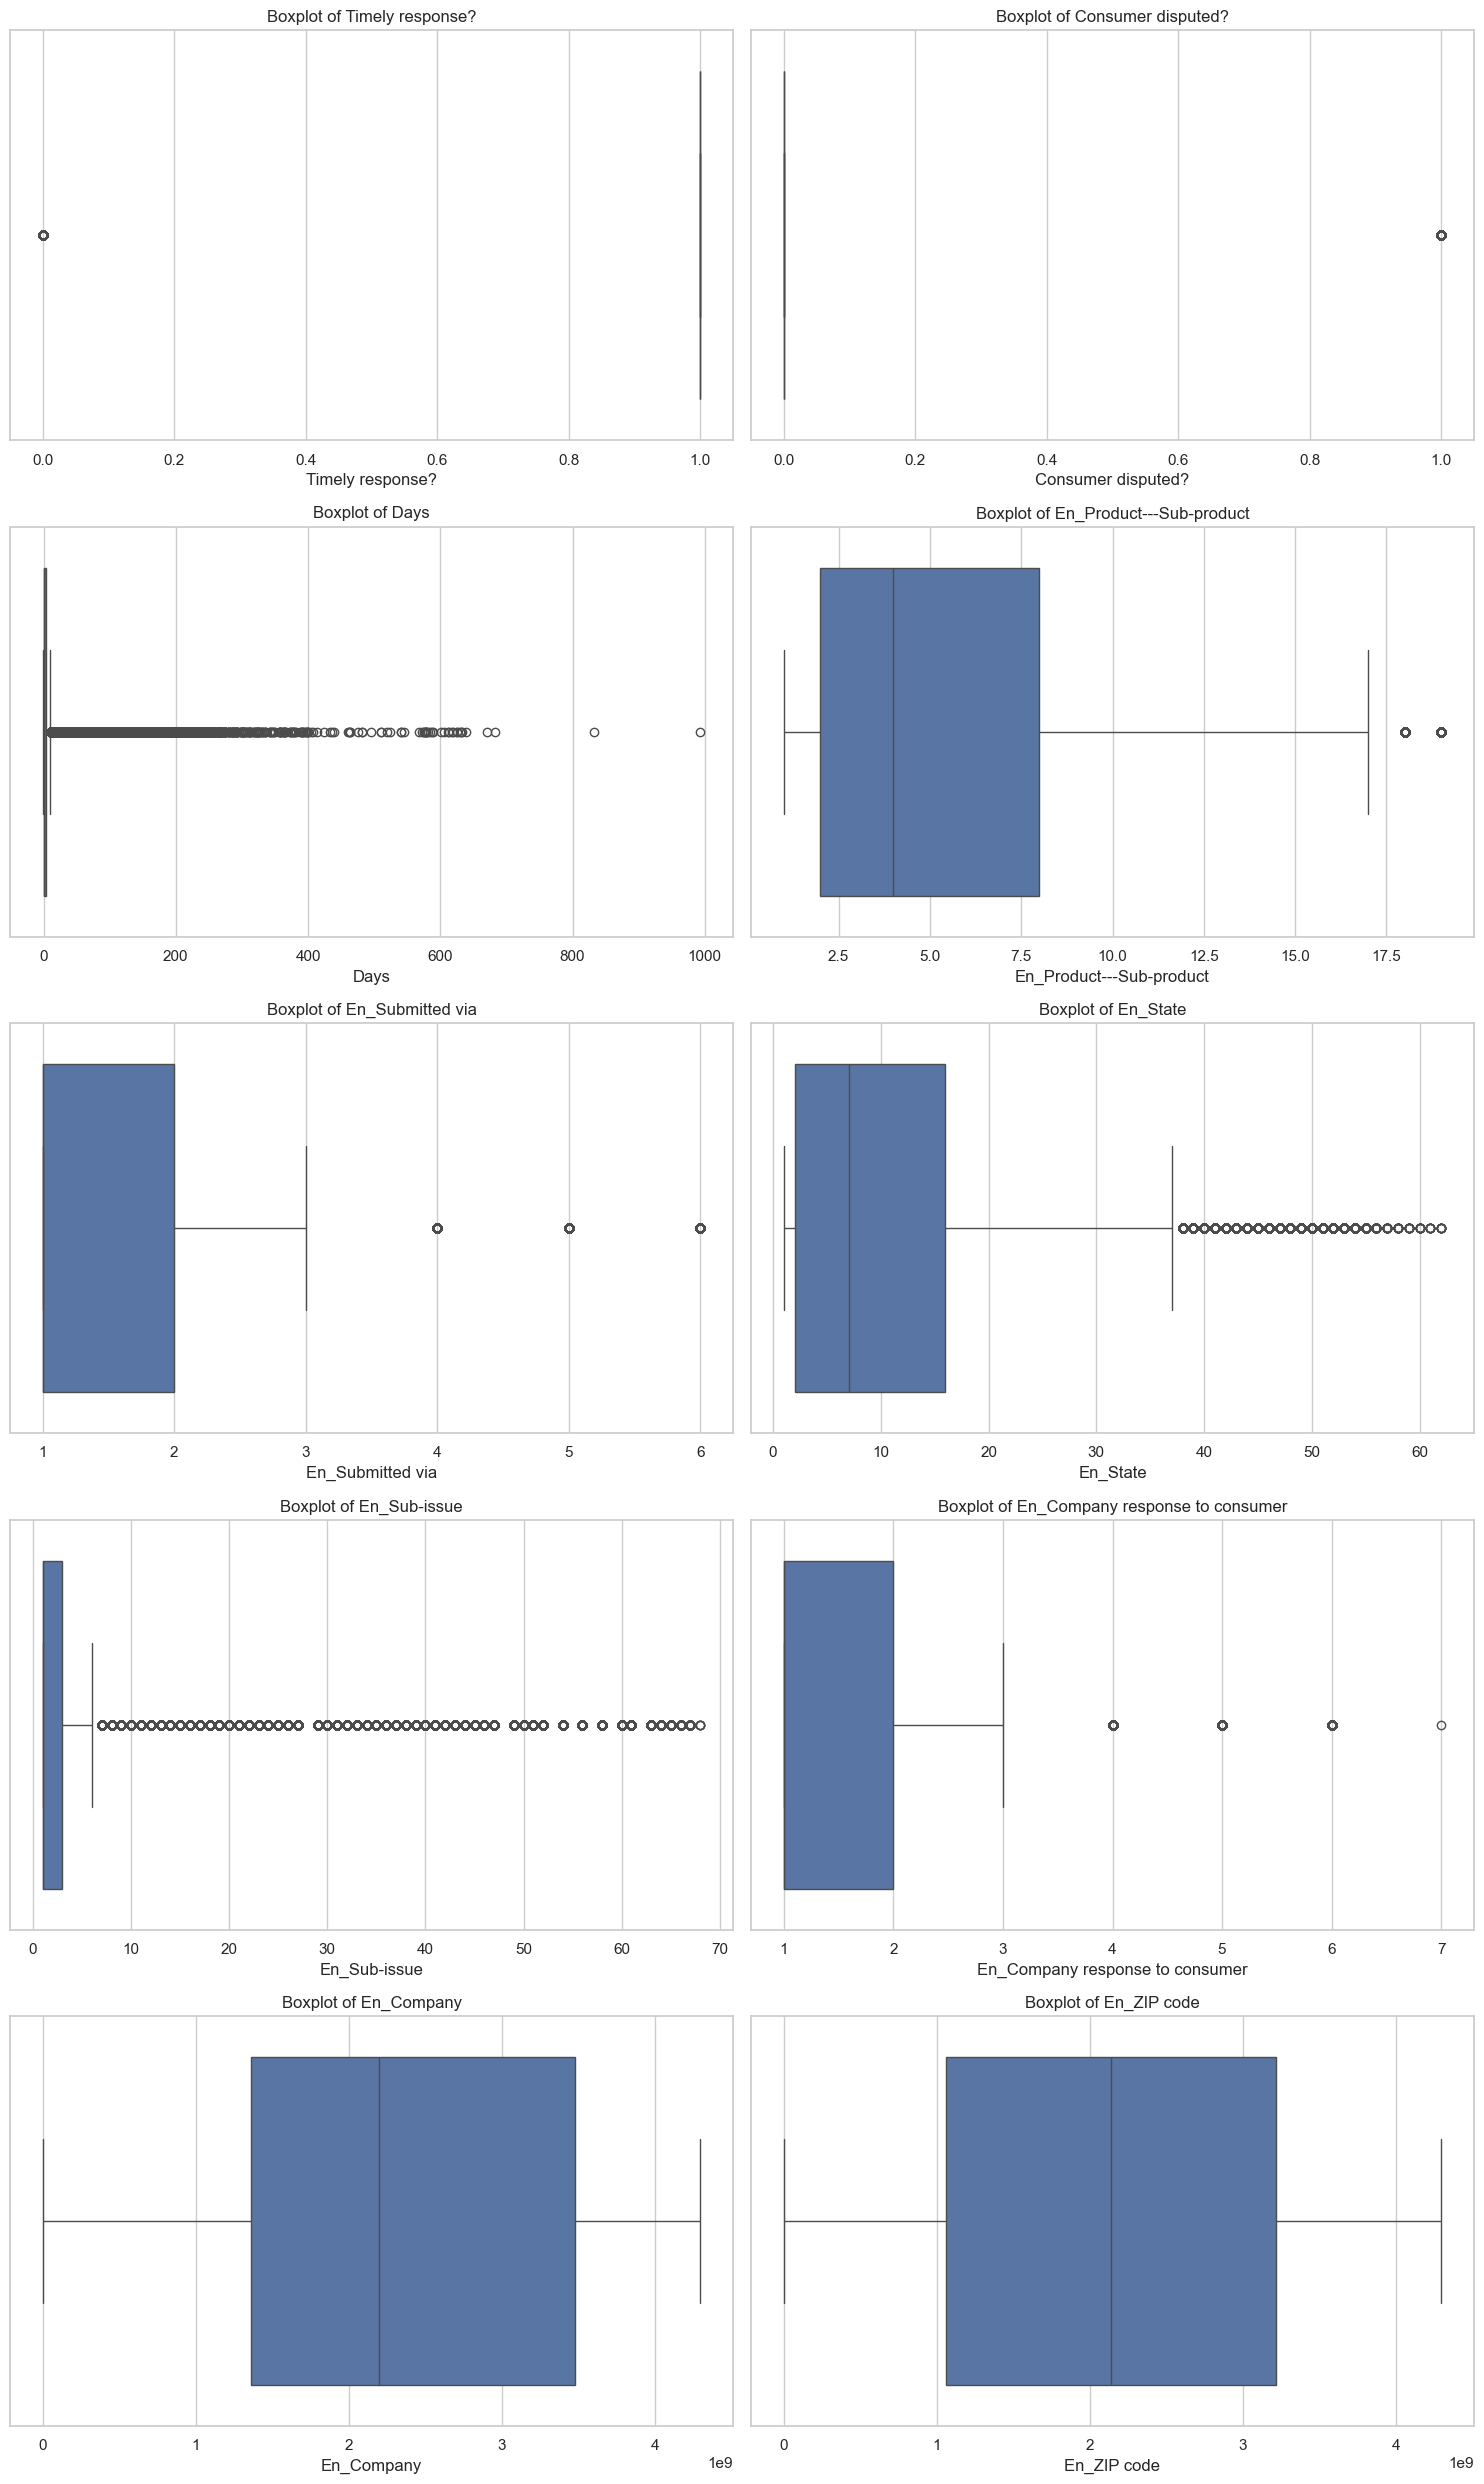

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Get all numeric columns (both int and float) from the Property DataFrame
numeric_columns = CC_train.select_dtypes(include="number").columns

# Determine the number of rows and columns needed for the subplots
num_plots = len(numeric_columns)
num_cols = 2  # Number of columns for subplots
num_rows = math.ceil(num_plots / num_cols)  # Calculate the required number of rows

# Set the figure size dynamically based on the number of rows
plt.figure(figsize=(15, 5 * num_rows))

# Loop through each numeric column and create a boxplot
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)  # Create subplots dynamically
    sns.boxplot(x=CC_train[col])  # Boxplot for each numeric column
    plt.title(f'Boxplot of {col}')  # Set the title to show the column name

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

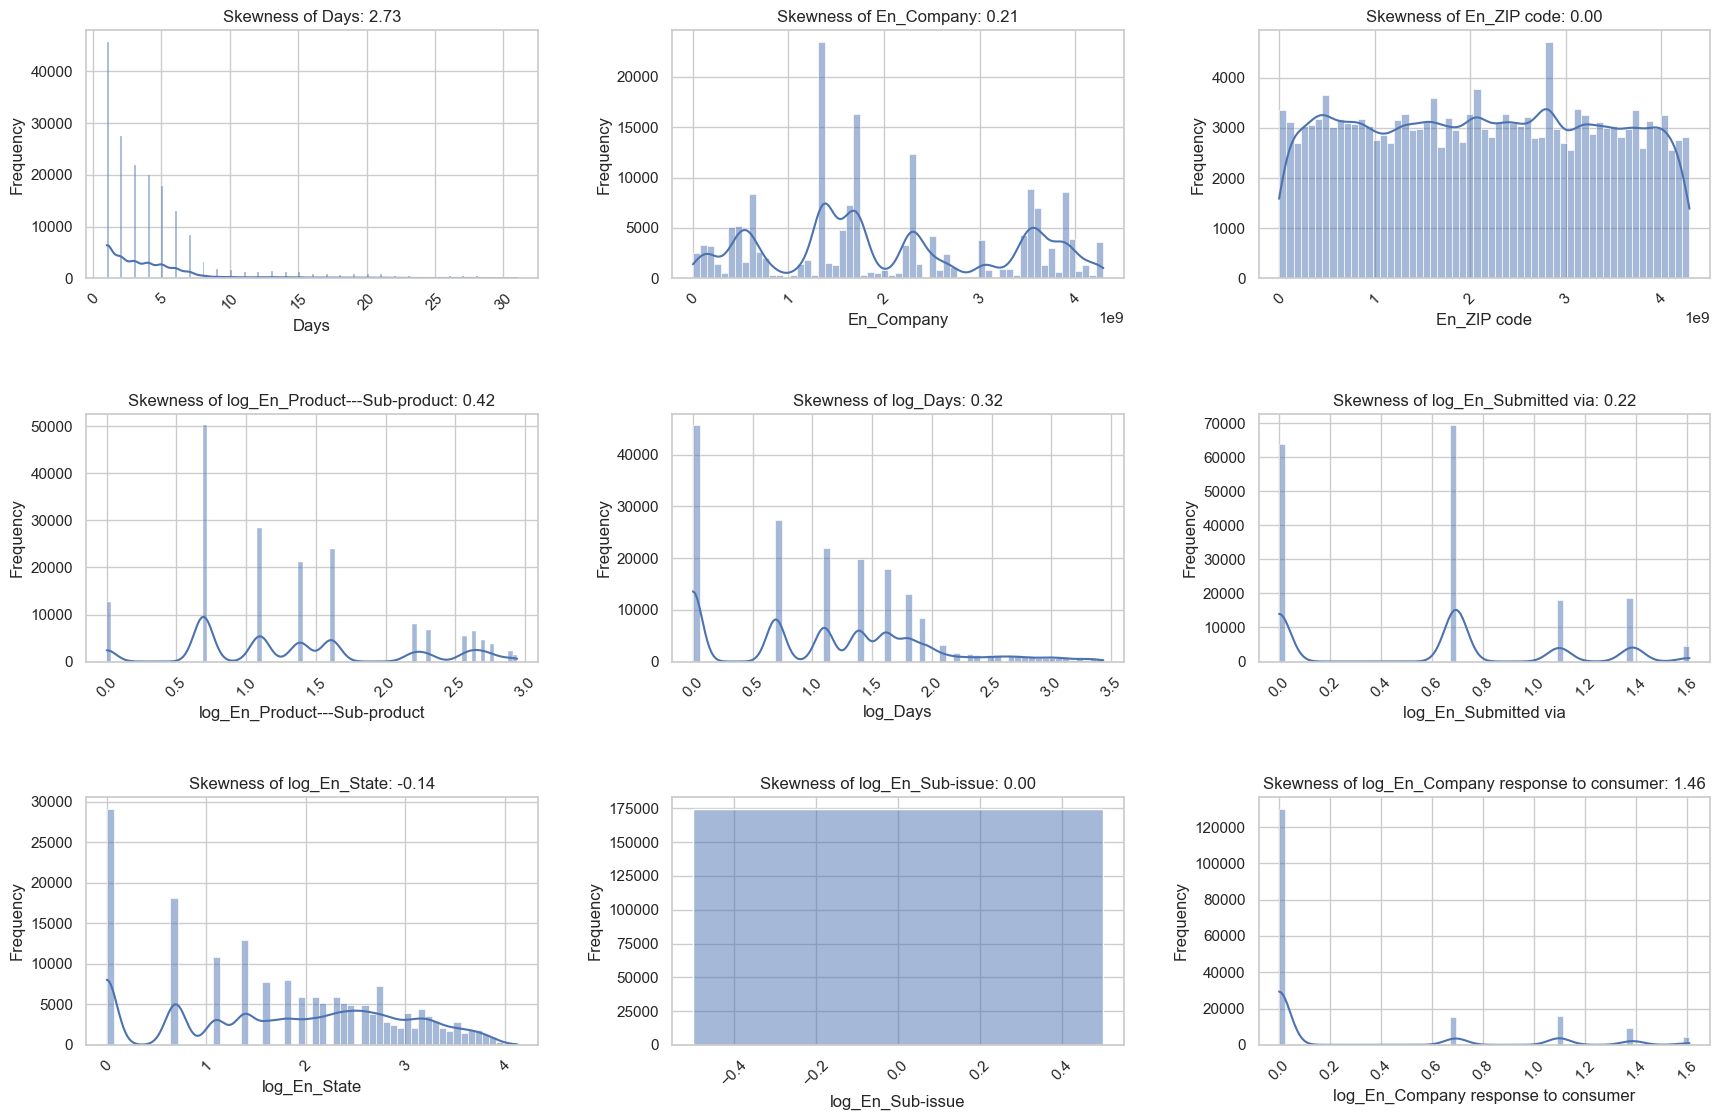

In [243]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Automatically select all numeric columns (int and float) from Property DataFrame
numeric_columns = CC_train.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows required to fit 3 plots per row
n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  # Ensure enough rows for all columns

# Create a figure with subplots
plt.figure(figsize=(18, 4 * n_rows))  # Dynamic figure size based on rows

# Loop through each numeric column and create a histogram with KDE
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)  # Create a grid with n_rows and 3 columns
    sns.histplot(CC_train[col], kde=True)  # Plot histogram with KDE
    plt.title(f'Skewness of {col}: {CC_train[col].skew():.2f}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Rotate x-axis labels for better readability if needed
    plt.xticks(rotation=45)

# Adjust layout to prevent overlap and display the plots
plt.tight_layout(pad=3.0)  # Increased padding between subplots
plt.show()


In [124]:
for col in CC_train.columns:
    print(col,':',CC_train[col].nunique())

Date received : 1759
Product : 7
Sub-product : 17
Issue : 63
Sub-issue : 61
Company : 3137
State : 62
ZIP code : 25489
Submitted via : 6
Date sent to company : 1705
Company response to consumer : 7
Timely response? : 2
Consumer disputed? : 2
Days : 394
Product---Sub-product : 19
En_Product---Sub-product : 19
En_Submitted via : 6
En_State : 62
En_Sub-issue : 61
En_Company response to consumer : 7
En_Company : 4980
En_ZIP code : 39850


In [77]:
CC_train['Consumer disputed?'].value_counts(normalize=True) * 100


Consumer disputed?
0    100.0
Name: proportion, dtype: float64

In [15]:
for col in ['Sub-product','Sub-issue','Consumer complaint narrative',
            'Company public response','Tags','Consumer consent provided?']:
    varname=col.replace('-','_').replace('?','').replace(" ",'_')+'_isNan'
    cd_train[varname]=np.where(pd.isnull(cd_train[col]),1,0)
    cd_train.drop([col],axis=1,inplace=True)
    cd_test[varname]=np.where(pd.isnull(cd_test[col]),1,0)
    cd_test.drop([col],axis=1,inplace=True)
    

In [49]:
cd_train.head(4)

NameError: name 'cd_train' is not defined

Product : 10
Issue : 63
Company : 219
State : 54
ZIP code : 880
Submitted via : 5
Company response to consumer : 6
Timely response? : 2
Consumer disputed? : 2


In [57]:
import pandas as pd

# Calculate the mean for each category
mean_encoding = C_train.groupby('Product---Sub-product')['Consumer disputed?'].mean()

new_df1 = CC_train.copy()
# Map the encoding back to the original DataFrame
new_df1['Encoded_Value'] = CC_train['Product---Sub-product'].map(mean_encoding)

# Rank the encoded values in descending order
new_df1['Rank_Product_Sub_product'] = CC_train['Encoded Value'].rank(ascending=False)
# Display the result
print(new_df1[['Product---Sub-product', 'Encoded_Value', 'Rank_Product_Sub_product']])
new_df1.to_excel(r'F:\jupyter\card.xlsx', index=False)


SyntaxError: invalid syntax (1683439884.py, line 7)

In [92]:
import pandas as pd

# Calculate the mean for each category
mean_encoding =CC_train.groupby('Product---Sub-product')['Consumer disputed?'].mean()

# Create a new DataFrame based on CC_train to avoid modifying the original
new_df2 = CC_train.copy()

# Map the encoding back to the new DataFrame
new_df2['Encoded_Value'] = new_df['Product---Sub-product'].map(mean_encoding)

# Rank the encoded values in descending order
new_df2['Rank_Product_Sub_product'] = new_df['Encoded_Value'].rank(ascending=False)

# Display the result
print(new_df2[['Product---Sub-product', 'Encoded_Value', 'Rank_Product_Sub_product']])
new_df2.to_excel(r'F:\jupyter\Rank_Product_Sub_product.xlsx', index=False)

                                    Product---Sub-product  Encoded_Value  \
0                            Credit card---Other mortgage       0.217389   
1       Bank account or service---(CD) Certificate of ...       0.267594   
2                       Credit reporting---Other mortgage       0.177304   
3                            Credit card---Other mortgage       0.217389   
4                            Credit card---Other mortgage       0.217389   
...                                                   ...            ...   
478416         Bank account or service---Checking account       0.194988   
478417                       Credit card---Other mortgage       0.217389   
478418                  Credit reporting---Other mortgage       0.177304   
478419             Mortgage---Conventional fixed mortgage       0.257704   
478420                      Consumer Loan---Vehicle lease       0.276165   

        Rank_Product_Sub_product  
0                       162908.5  
1                

In [7]:
k=cd_train['Issue'].value_counts()
for val in k.axes[0][0:10]:
    varname='Issue_'+val.replace(',','_').replace(' ','_')
    cd_train[varname]=np.where(cd_train['Issue']==val,1,0)
    cd_test[varname]=np.where(cd_test['Issue']==val,1,0)
del cd_train['Issue']
del cd_test['Issue']

In [21]:
for col in cd_train.select_dtypes(['object']).columns:
    print(col,':',cd_train[col].nunique())

Product : 10
State : 54
Submitted via : 5
Company response to consumer : 6
Timely response? : 2


In [22]:
k=cd_train['State'].value_counts()
for val in k.axes[0][0:15]:
    varname='State_'+val.replace(',','_').replace(' ','_')
    cd_train[varname]=np.where(cd_train['State']==val,1,0)
    cd_test[varname]=np.where(cd_test['State']==val,1,0)
del cd_train['State']
del cd_test['State']

In [23]:
for col in ['Product', 'Submitted via', 'Company response to consumer', 'Timely response?']:
    temp_train = pd.get_dummies(cd_train[col], prefix=col, drop_first=True)
    cd_train = pd.concat([cd_train, temp_train], axis=1)
    cd_train.drop([col], axis=1, inplace=True)
    temp_test = pd.get_dummies(cd_test[col], prefix=col, drop_first=True)
    cd_test = pd.concat([cd_test, temp_test], axis=1)
    cd_test.drop([col], axis=1, inplace=True)


In [24]:
y=cd_train['Consumer disputed?']
x=cd_train.drop(['Consumer disputed?','Complaint ID'],axis=1)


Decision tree

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = clf.score(x_test, y_test)

print("Accuracy:", accuracy)

Accuracy: 0.69


In [29]:
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)


[[126  30]
 [ 32  12]]


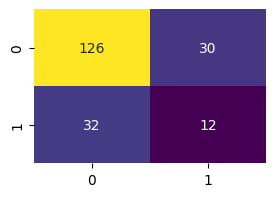

In [30]:
plt.figure(figsize = (3,2))
sns.heatmap(confusion_mat, annot = True, fmt='d', cbar=False, cmap='viridis')
plt.show()

Random forest regression

In [31]:
from sklearn.ensemble import RandomForestRegressor
regression_rf = RandomForestRegressor()
regression_rf.fit(x_train, y_train)

RandomForestRegressor()

In [32]:
from sklearn.metrics import r2_score,  mean_squared_error

In [33]:
y_pred = regression_rf.predict(x_test)
r2_score(y_test, y_pred)

-0.019521353992311363

In [34]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.17494986434508064


XGBoost


In [42]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [43]:
clf = xgb.XGBClassifier(
    n_estimators=100,     
    learning_rate=0.1,    
    max_depth=6,          
    objective='binary:logistic',  
    eval_metric='logloss',        
    use_label_encoder=False,      
    random_state=42
)

In [49]:
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
y_pred_proba = clf.predict_proba(x_test)[:, 1]  
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")

print(f"ROC AUC Score: {roc_auc:.4f}")


Accuracy: 0.7750
ROC AUC Score: 0.5948


In [51]:
train_columns = clf.feature_names_in_  

cd_test_aligned = cd_test.drop(['Complaint ID'], axis=1).reindex(columns=train_columns, fill_value=0)
predictions = clf.predict_proba(cd_test_aligned)[:, 1]
submission = pd.DataFrame({'Complaint ID': cd_test['Complaint ID'], 'Consumer disputed?': predictions})
submission.to_csv('submission.csv', index=False)

